In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score, hinge_loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
train_path = '/kaggle/input/fer2013/train'
test_path = '/kaggle/input/fer2013/test'
target_size = (48, 48)
batch_size = 28709

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=target_size,
    batch_size=7178,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [5]:
emotion_labels = sorted(os.listdir(train_path))
print("Emotions Labels:\n", emotion_labels)


Emotions Labels:
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



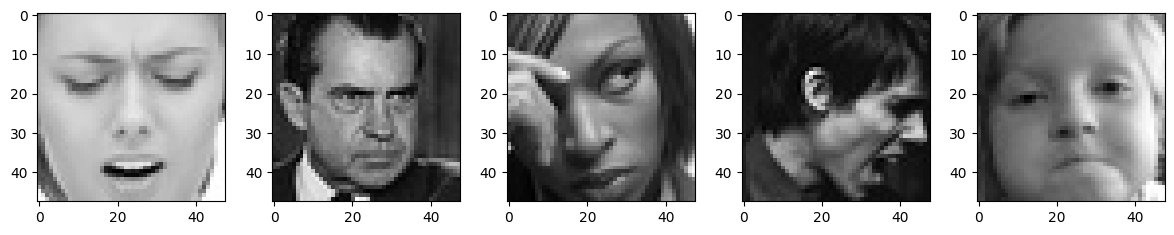

In [7]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Disgust: 



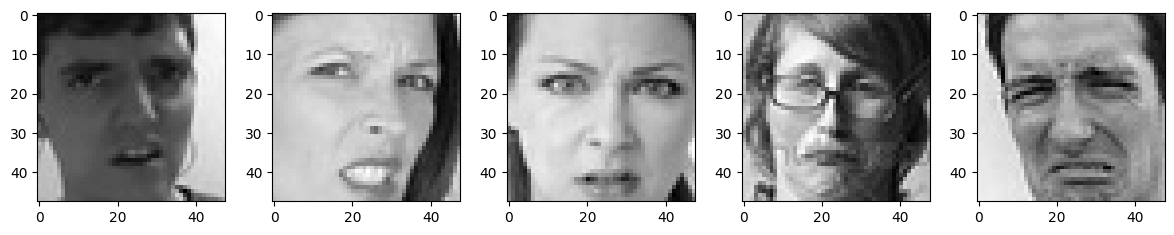

In [8]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Fear: 



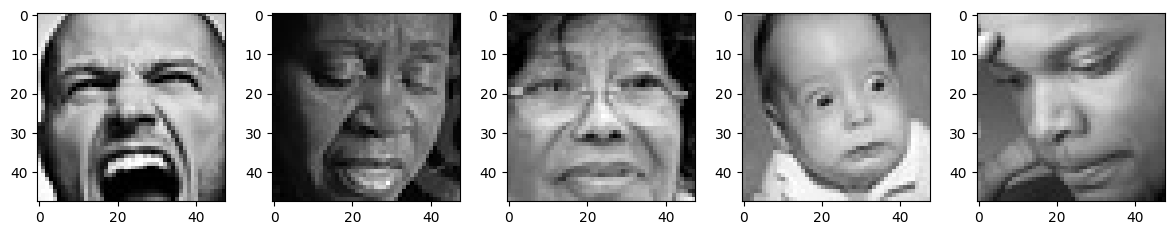

In [9]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



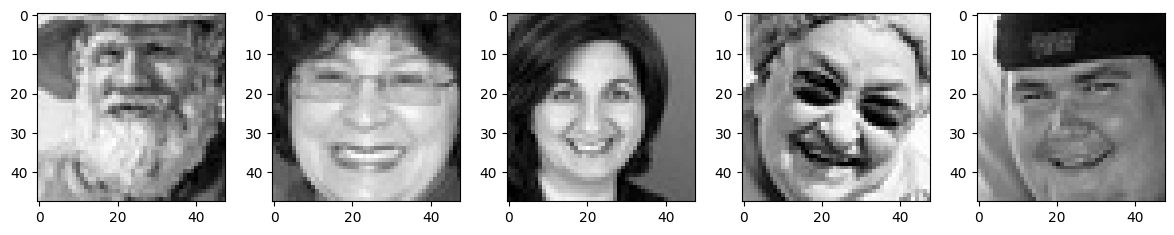

In [10]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



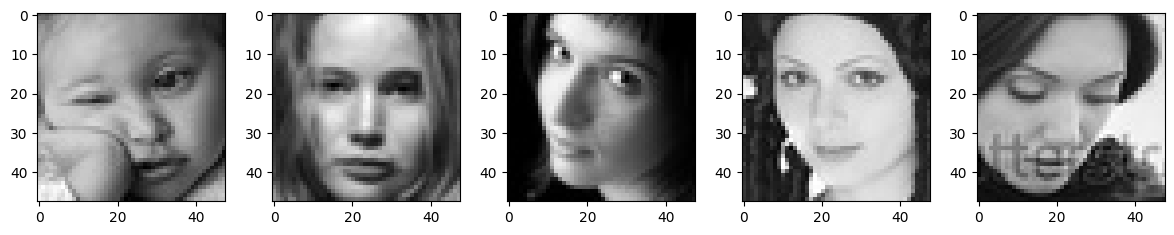

In [11]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



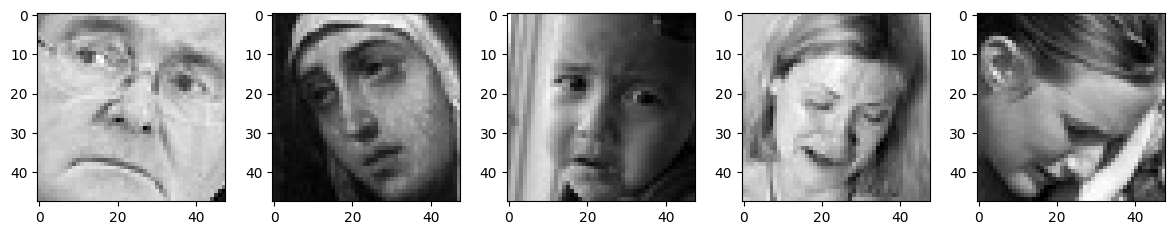

In [12]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

Surprise: 



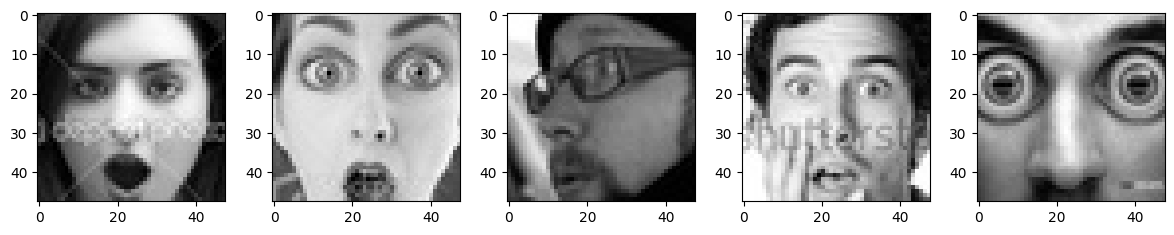

In [13]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

In [14]:
emotions = os.listdir('/kaggle/input/fer2013/train')
for emotion in emotions:
    count = len(os.listdir(f'/kaggle/input/fer2013/train/{emotion}'))
    print(f'{emotion} faces={count}')

surprise faces=3171
fear faces=4097
angry faces=3995
neutral faces=4965
sad faces=4830
disgust faces=436
happy faces=7215


In [15]:
emotions = os.listdir('/kaggle/input/fer2013/test')
for emotion in emotions:
    count = len(os.listdir(f'/kaggle/input/fer2013/test/{emotion}'))
    print(f'{emotion} faces={count}')

surprise faces=831
fear faces=1024
angry faces=958
neutral faces=1233
sad faces=1247
disgust faces=111
happy faces=1774


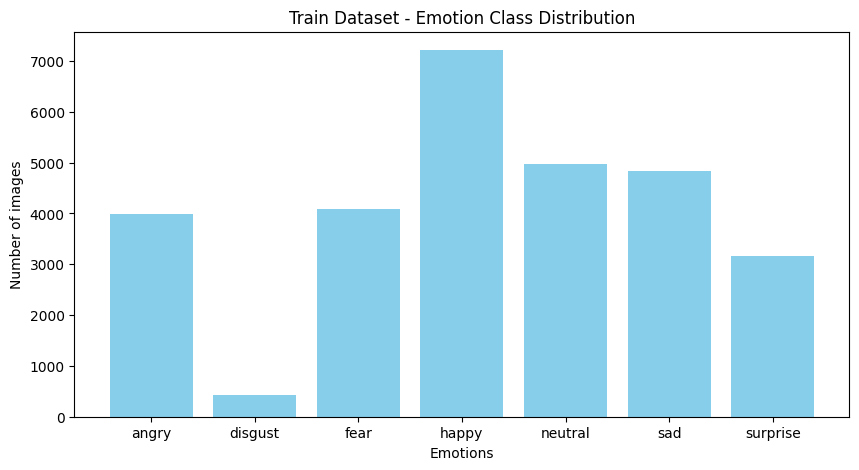

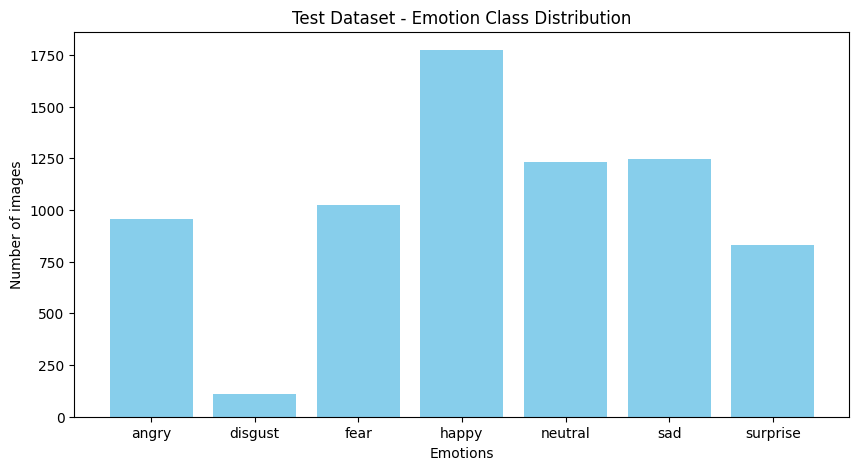

In [16]:
# Define the function to plot data distribution
def plot_data_distribution(data_path, title):
    # Get emotion classes from the directories
    emotion_classes = sorted(os.listdir(data_path))
    
    # Count images in each class
    image_counts = [len(os.listdir(os.path.join(data_path, emotion))) for emotion in emotion_classes]
    
    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(emotion_classes, image_counts, color='skyblue')
    plt.xlabel("Emotions")
    plt.ylabel("Number of images")
    plt.title(f"{title} Dataset - Emotion Class Distribution")
    plt.show()

# Plot distribution for train and test datasets
plot_data_distribution(train_path, "Train")
plot_data_distribution(test_path, "Test")


In [17]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

In [18]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)

In [19]:
pca = PCA(n_components=0.95, whiten=True)
train_images_pca = pca.fit_transform(train_images_flat)
val_images_pca = pca.transform(val_images_flat)

In [20]:
train_labels_single = np.argmax(train_labels, axis=1)
val_labels_single = np.argmax(val_labels, axis=1)

In [21]:
clf = svm.SVC(kernel='rbf', C=10, gamma='scale', decision_function_shape='ovr')
clf.fit(train_images_pca, train_labels_single)

SVC(C=10)

In [22]:
val_predictions = clf.predict(val_images_pca)
accuracy = accuracy_score(val_labels_single, val_predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 48.19%


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

conf_matrix = confusion_matrix(val_labels_single, val_predictions)

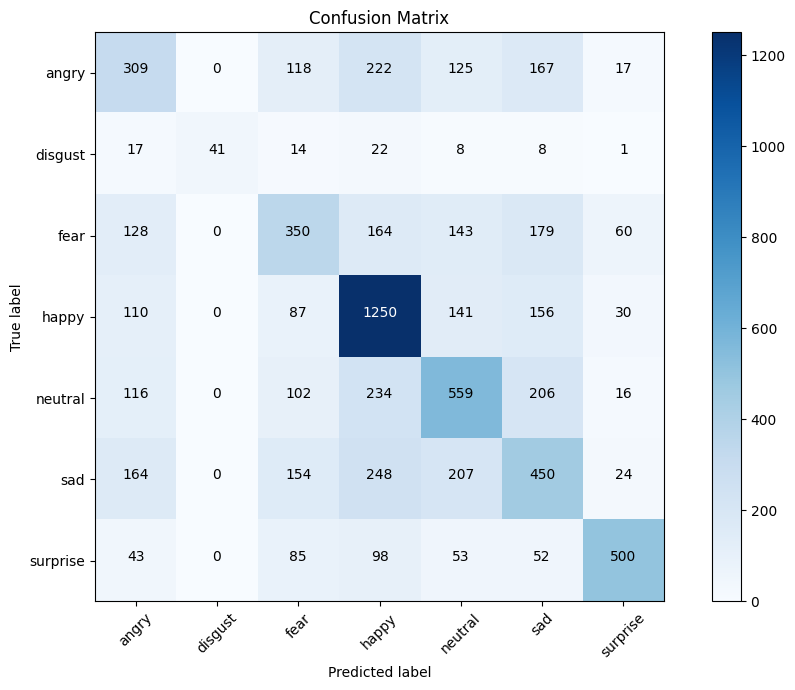

In [24]:
num_classes = len(emotion_labels)

# Confusion Matrix Plot
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, emotion_labels, rotation=45)
plt.yticks(tick_marks, emotion_labels)

thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [25]:
# Classification Report for precision, recall, and f1 score
report = classification_report(val_labels_single, val_predictions, target_names=emotion_labels)
print(report)

def plot_image_with_prediction(image, prediction, true_label):
    plt.imshow(image.reshape(48, 48), cmap='gray')
    plt.title(f'Predicted: {emotion_labels[prediction]}, True: {emotion_labels[true_label]}')
    plt.show()

              precision    recall  f1-score   support

       angry       0.35      0.32      0.33       958
     disgust       1.00      0.37      0.54       111
        fear       0.38      0.34      0.36      1024
       happy       0.56      0.70      0.62      1774
     neutral       0.45      0.45      0.45      1233
         sad       0.37      0.36      0.37      1247
    surprise       0.77      0.60      0.68       831

    accuracy                           0.48      7178
   macro avg       0.55      0.45      0.48      7178
weighted avg       0.49      0.48      0.48      7178



In [26]:
val_margins = clf.decision_function(val_images_pca)
loss = hinge_loss(val_labels_single, val_margins)
print(f'Test Loss (Hinge Loss): {loss:.4f}')

Test Loss (Hinge Loss): 1.7968


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression Baseline
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_images_pca, train_labels_single)
log_reg_predictions = log_reg.predict(val_images_pca)
log_reg_accuracy = accuracy_score(val_labels_single, log_reg_predictions)
print(f'Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%')

# k-Nearest Neighbors (k-NN) Baseline
k_neighbors = 5 
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(train_images_pca, train_labels_single)
knn_predictions = knn.predict(val_images_pca)
knn_accuracy = accuracy_score(val_labels_single, knn_predictions)
print(f'k-NN Accuracy with k={k_neighbors}: {knn_accuracy * 100:.2f}%')


Logistic Regression Accuracy: 37.25%
k-NN Accuracy with k=5: 25.58%


In [28]:
def plot_image_with_prediction(image, prediction, true_label):
    plt.imshow(image.reshape(48, 48), cmap='gray')
    plt.title(f'Predicted: {emotion_labels[prediction]}, True: {emotion_labels[true_label]}')
    plt.show()

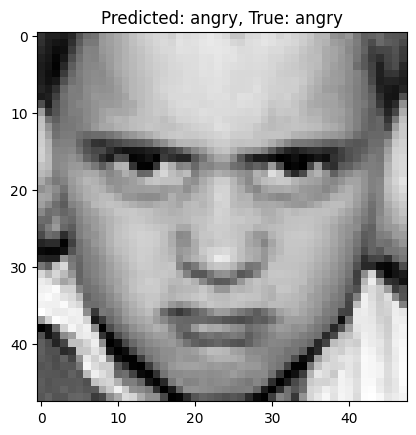

In [29]:
index = 79
plot_image_with_prediction(val_images[index], val_predictions[index], val_labels_single[index])
